# For Google Colab Users , Please Install This

In [1]:
!pip install pandas numpy matplotlib sklearn seaborn yfinance datetime

# Import the Datasets and the Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime

In [3]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
stock_list = 'INDF.JK'

In [4]:
datasets = yf.download(stock_list,start,end)

[*********************100%***********************]  1 of 1 completed


In [5]:
datasets.to_csv('datasets.CSV')

In [6]:
df = pd.read_csv('datasets.CSV')

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-25,6675.0,6725.0,6625.0,6650.0,6382.072266,6118400
1,2021-10-26,6700.0,6725.0,6600.0,6675.0,6406.064941,7012800
2,2021-10-27,6625.0,6675.0,6450.0,6475.0,6214.123047,9480800
3,2021-10-28,6450.0,6500.0,6350.0,6400.0,6142.144531,10016800
4,2021-10-29,6400.0,6475.0,6350.0,6350.0,6094.159180,8757400
...,...,...,...,...,...,...,...
242,2022-10-19,6200.0,6250.0,6125.0,6225.0,6225.000000,12959800
243,2022-10-20,6225.0,6350.0,6200.0,6350.0,6350.000000,12801200
244,2022-10-21,6350.0,6375.0,6275.0,6275.0,6275.000000,7353500
245,2022-10-24,6300.0,6350.0,6275.0,6300.0,6300.000000,7061800


In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# Analyzing the Data

In [9]:
df.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02
mean,6431.275304,6487.145749,6364.068826,6427.732794,6230.667162,9.546553e+06
std,301.783474,301.771954,293.453199,307.246692,296.013797,4.999099e+06
min,5750.000000,5825.000000,5725.000000,5725.000000,5494.340332,1.824500e+06
25%,6225.000000,6287.500000,6200.000000,6225.000000,6046.173828,6.195750e+06
50%,6375.000000,6425.000000,6325.000000,6375.000000,6166.137695,8.360500e+06
75%,6600.000000,6650.000000,6525.000000,6600.000000,6418.061279,1.180100e+07
max,7225.000000,7250.000000,7125.000000,7250.000000,6957.898438,3.562910e+07


Now we are going to analyze the correlation between each features in the datasets

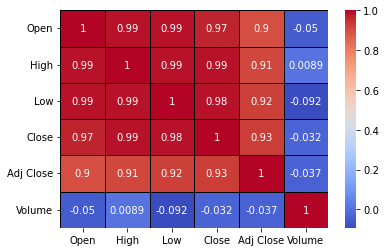

In [11]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linecolor='black',linewidths=1)
plt.show()

From this datasets we know that the market is not based on the volume transaction, it's actually based on the pricing on the markets. This is normal behaviour especially in the markets price. Therefore we are going to drop the volume of the transaction. Regarding the close price and the Adjusted close price is having the similarity with the datasets. Therefore we are going to use Close and not the Adjusted Close Price. We are also deleting the date column because it's just for indexing to make it easier.

In [12]:
df.drop('Volume',axis=1,inplace=True)
df.drop('Adj Close',axis=1,inplace=True)
df.drop('Date',axis=1,inplace=True)

# Splitting into dependant and independant variable

In [13]:
df

,Open,High,Low,Close
0,6675.0,6725.0,6625.0,6650.0
1,6700.0,6725.0,6600.0,6675.0
2,6625.0,6675.0,6450.0,6475.0
3,6450.0,6500.0,6350.0,6400.0
4,6400.0,6475.0,6350.0,6350.0
...,...,...,...,...
242,6200.0,6250.0,6125.0,6225.0
243,6225.0,6350.0,6200.0,6350.0
244,6350.0,6375.0,6275.0,6275.0
245,6300.0,6350.0,6275.0,6300.0


In [14]:
x = df.iloc[:,0:3]

In [15]:
x

,Open,High,Low
0,6675.0,6725.0,6625.0
1,6700.0,6725.0,6600.0
2,6625.0,6675.0,6450.0
3,6450.0,6500.0,6350.0
4,6400.0,6475.0,6350.0
...,...,...,...
242,6200.0,6250.0,6125.0
243,6225.0,6350.0,6200.0
244,6350.0,6375.0,6275.0
245,6300.0,6350.0,6275.0


In [16]:
y = df.iloc[:,3]

In [17]:
y

0      6650.0
1      6675.0
2      6475.0
3      6400.0
4      6350.0
        ...  
242    6225.0
243    6350.0
244    6275.0
245    6300.0
246    6200.0
Name: Close, Length: 247, dtype: float64

# Splitting into Train and Test Datasets

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=777)

# Training our models using Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [22]:
model.fit(x_train,y_train)

LinearRegression()

# Testing accuracy of the models

In [23]:
x_pred = model.predict(x_test)
y_pred = model.predict(x_train)

In [24]:
print("Machine Learning Training Accuracy Results")
print("--------------------------------------------")
print("Train Score : ",model.score(x_train,y_train))
print("Test Score : ",model.score(x_test,y_test))

Machine Learning Training Accuracy Results
--------------------------------------------
Train Score :  0.9818439947499931
Test Score :  0.9826494219302951


In [25]:
prediction = model.predict(x_train)

In [26]:
from sklearn import metrics

In [27]:
print("Training Accuracy Calculation based on certain algorithm")
print("----------------------------------------------------------")
print("R2 Square Value (R2): ",metrics.r2_score(y_train,prediction))
print("Mean Absolute Error (MAE): ",metrics.mean_absolute_error(y_train,prediction))
print("Mean Squared Error (MSE): ",metrics.mean_squared_error(y_train,prediction))
print("Root Mean Squared Error (RMSE) : ",np.sqrt(metrics.mean_absolute_error(y_train,prediction)))

Training Accuracy Calculation based on certain algorithm
----------------------------------------------------------
R2 Square Value (R2):  0.9818439947499931
Mean Absolute Error (MAE):  33.4348410751688
Mean Squared Error (MSE):  1649.2094730503704
Root Mean Squared Error (RMSE) :  5.782286837849607


In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
score = cross_val_score(model,x_train,y_train,scoring='r2',cv=5)

In [30]:
print("Overfitting and Underfitting Tests")
print("------------------------------------------------")
print("Cross Validation Accuracy :",score.mean() * 100)

Overfitting and Underfitting Tests
------------------------------------------------
Cross Validation Accuracy : 97.84982692388212


# Formula of the models

In [31]:
print(model.coef_)

[-0.56631985  0.90550735  0.68835266]


In [32]:
print(model.intercept_)

-186.66517763786578


So the formula for the model is the above , but just take a note for every stocks is having different models.

# Visualizing The models

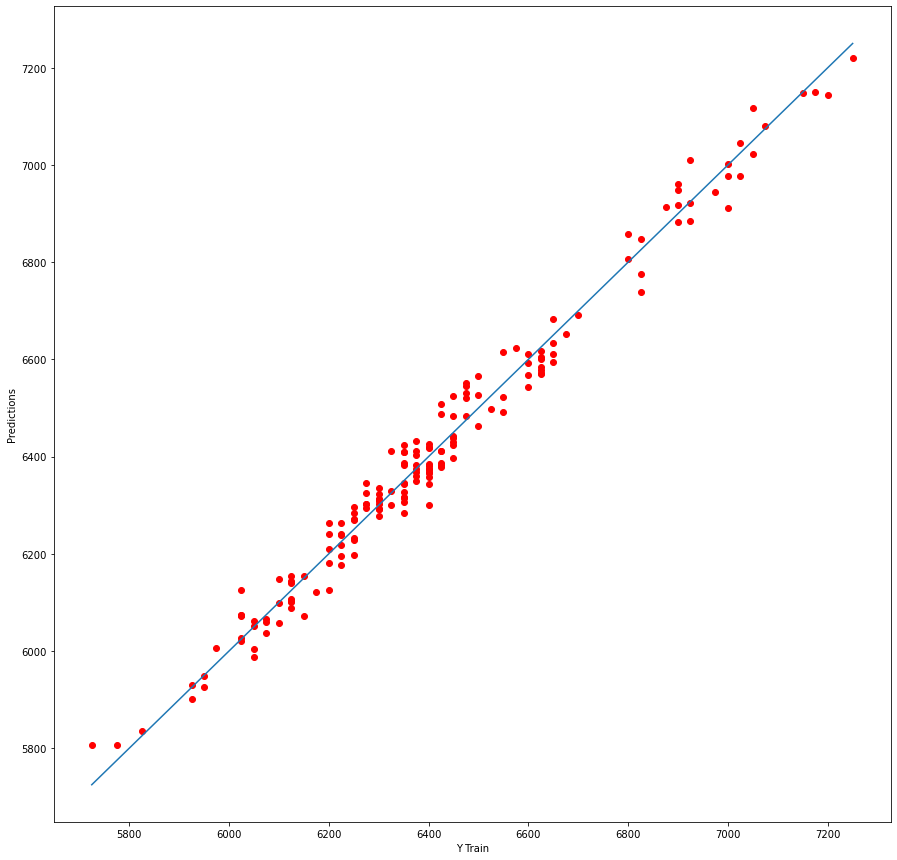

In [33]:
plt.figure(figsize=(15,15))
plt.scatter(y_train, prediction, color='red')
begin = max(max(prediction), max(y_train))
end = min(min(prediction), min(y_train))
plt.plot([begin, end], [begin, end])
plt.xlabel('Y Train')
plt.ylabel('Predictions')
plt.show()

# From here we will make the GUI

GUI Libraries

In [34]:
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [35]:
# tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()


label_Title = tk.Label(root, text='Stock Prediction using SKLearn')
label_Title.config(font=('Arial', 20))
canvas1.create_window(250, 50, window=label_Title)

# Creating Entry to input i
# New_Interest_Rate label and input box
label1 = tk.Label(root, text='Type Open Value: ')
canvas1.create_window(140, 100, window=label1)
entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_Unemployment_Rate label and input box
label2 = tk.Label(root, text='Type High Value: ')
canvas1.create_window(140, 120, window=label2)
entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)

label3 = tk.Label(root, text='Type Low Value: ')
canvas1.create_window(140, 140, window=label3)
entry3 = tk.Entry (root) # create 3rd entry box
canvas1.create_window(270, 140, window=entry3)

def Close_value(): 
    global New_Open #our 1st input variable
    New_Open = float(entry1.get()) 
    
    global New_High #our 2nd input variable
    New_High = float(entry2.get()) 
    
    global New_Low
    New_Low = float(entry3.get())
    
    Prediction_result  = ('Predicted Close Value : ', model.predict([[New_Open ,New_High, New_Low]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Close Value',command=Close_value, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 170, window=button1)

# Plots thats show the correlation of independent variable to dependent
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(df['Open'].astype(float),df['Close'].astype(float), color = 'r')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
ax3.legend(['Close Value']) 
ax3.set_xlabel('Open')
ax3.set_title('Open Vs. Close Value')

figure4 = plt.Figure(figsize=(5,4), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(df['High'].astype(float),df['Close'].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
ax4.legend(['Close Value']) 
ax4.set_xlabel('High')
ax4.set_title('High Vs. Close Value')

figure5 = plt.Figure(figsize=(5,4), dpi=100)
ax5 = figure5.add_subplot(111)
ax5.scatter(df['Low'].astype(float),df['Close'].astype(float), color = 'b')
scatter5 = FigureCanvasTkAgg(figure5, root) 
scatter5.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
ax5.legend(['Close Value']) 
ax5.set_xlabel('Low')
ax5.set_title('Low Vs. Close Value')

root.mainloop()

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
